In [104]:
import pandas as pd
import matplotlib as mlt
import seaborn as sns
import numpy as np
import pickle

In [105]:
df = pd.read_csv('~/my_proj/data/car.csv')

Car_id: Уникальный идентификатор для каждого автомобиля в наборе данных.

Date: Дата сделки купли-продажи автомобиля.

Customer Name: Имя клиента, приобретающего автомобиль.

Gender: Пол клиента (например, мужчина, женщина).

Annual Income: Годовой доход клиента.

Dealer_Name: Название автодилера, связанного с продажей.

Company: Компания или марка автомобиля.

Model: Название модели автомобиля.

Engine: Технические характеристики двигателя автомобиля.

Transmission: Тип коробки передач в автомобиле (например, Автомат, Механическая).

Color: Цвет кузова автомобиля.

Price ($): Указана стоимость продаваемого автомобиля.

Dealer_No: Идентификационный номер дилера, связанный с продажей.

Body Style: Стиль или дизайн кузова автомобиля (например, седан, внедорожник).

Phone: Контактный телефон, связанный с продажей автомобиля.

Dealer_Region: Географический регион или местонахождение автодилера.

In [106]:
df.head(10)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
5,C_CND_000006,1/2/2022,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale
6,C_CND_000007,1/2/2022,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,14000,78758-7841,Passenger,7727879,Austin
7,C_CND_000008,1/2/2022,Graham,Male,13500,U-Haul CO,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,Pale White,42000,78758-7841,Passenger,6206512,Austin
8,C_CND_000009,1/2/2022,Naomi,Male,815000,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,82000,85257-3102,Hardtop,7194857,Pasco
9,C_CND_000010,1/2/2022,Grayson,Female,13500,Rabun Used Car Sales,Ford,Escort,DoubleÂ Overhead Camshaft,Auto,Pale White,15000,85257-3102,Passenger,7836892,Scottsdale


In [107]:
for col in df.columns:
    print(col)
    print(len(df[col].unique()))
print("Количество записей:", len(df))

Car_id
23906
Date
612
Customer Name
3022
Gender
2
Annual Income
2508
Dealer_Name
28
Company
30
Model
154
Engine
2
Transmission
2
Color
3
Price ($)
870
Dealer_No 
7
Body Style
5
Phone
23804
Dealer_Region
7
Количество записей: 23906


Customer Name не информативный признак, так как просто является именем клиента (имена клиентов повторяются, искать взаимосвязи с именем клиента не целесообразно)
Car_id уникальный индификатор
Gender категориальный признак
Annual Income количественный признак
Dealer_Name номинальный признак
Company номинальный признак
Model номинальный признак
Engine категориальный признак
Transmission категориальный признак
Color номинальный признак
Price ($) количественный признак
Dealer_Region категориальный признак
Body Style категориальный признак
Phone излишний признак

In [108]:
df['Gender'] = df['Gender'].astype('category')
df['Dealer_Name'] = df['Dealer_Name'].astype('category')
df['Company'] = df['Company'].astype('category')
df['Model'] = df['Model'].astype('category')
df['Engine'] = df['Engine'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Color'] = df['Color'].astype('category')
df['Dealer_Region'] = df['Dealer_Region'].astype('category')
df['Body Style'] = df['Body Style'].astype('category')


df['Price ($)'] = df['Price ($)'].astype('int16')
df['Annual Income'] = df['Annual Income'].astype('int16')


In [109]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_id         23906 non-null  object  
 1   Date           23906 non-null  object  
 2   Customer Name  23905 non-null  object  
 3   Gender         23906 non-null  category
 4   Annual Income  23906 non-null  int16   
 5   Dealer_Name    23906 non-null  category
 6   Company        23906 non-null  category
 7   Model          23906 non-null  category
 8   Engine         23906 non-null  category
 9   Transmission   23906 non-null  category
 10  Color          23906 non-null  category
 11  Price ($)      23906 non-null  int16   
 12  Dealer_No      23906 non-null  object  
 13  Body Style     23906 non-null  category
 14  Phone          23906 non-null  int64   
 15  Dealer_Region  23906 non-null  category
dtypes: category(9), int16(2), int64(1), object(4)
memory usage: 1.2+ MB


In [110]:
df = df.loc[df['Price ($)'] >= 10000]
df = df.loc[df['Annual Income'] >= 1000]

In [111]:
df.describe()

,Annual Income,Price ($),Phone
count,10420.000000,10420.000000,1.042000e+04
mean,15783.581286,20779.009693,7.497706e+06
std,7540.285753,5339.250109,8.663916e+05
min,1032.000000,10000.000000,6.000101e+06
25%,13500.000000,17000.000000,6.751384e+06
50%,13500.000000,21000.000000,7.505714e+06
75%,20352.000000,25000.000000,8.245048e+06
max,32748.000000,32600.000000,8.998913e+06


In [113]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['Gender',
 'Dealer_Name',
 'Company',
 'Model',
 'Engine',
 'Transmission',
 'Color',
 'Body Style',
 'Dealer_Region']

In [114]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['Annual Income', 'Price ($)', 'Phone']

In [115]:
df = df.drop(columns=['Phone', "Customer Name", "Car_id"])

In [116]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 10420 entries, 0 to 23904
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Date           10420 non-null  object  
 1   Gender         10420 non-null  category
 2   Annual Income  10420 non-null  int16   
 3   Dealer_Name    10420 non-null  category
 4   Company        10420 non-null  category
 5   Model          10420 non-null  category
 6   Engine         10420 non-null  category
 7   Transmission   10420 non-null  category
 8   Color          10420 non-null  category
 9   Price ($)      10420 non-null  int16   
 10  Dealer_No      10420 non-null  object  
 11  Body Style     10420 non-null  category
 12  Dealer_Region  10420 non-null  category
dtypes: category(9), int16(2), object(2)
memory usage: 395.5+ KB


In [117]:
for cat in cat_features:
    print(f'{cat} - numer of unique = {df[cat].nunique()}')

Gender - numer of unique = 2
Dealer_Name - numer of unique = 28
Company - numer of unique = 30
Model - numer of unique = 149
Engine - numer of unique = 2
Transmission - numer of unique = 2
Color - numer of unique = 3
Body Style - numer of unique = 5
Dealer_Region - numer of unique = 7


In [ ]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

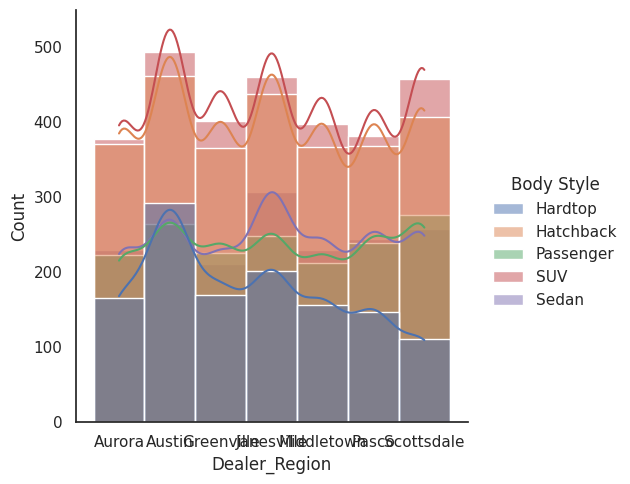

In [131]:
sns.displot(df, x='Dealer_Region', bins=100, hue='Body Style', kde=True, log_scale=True)

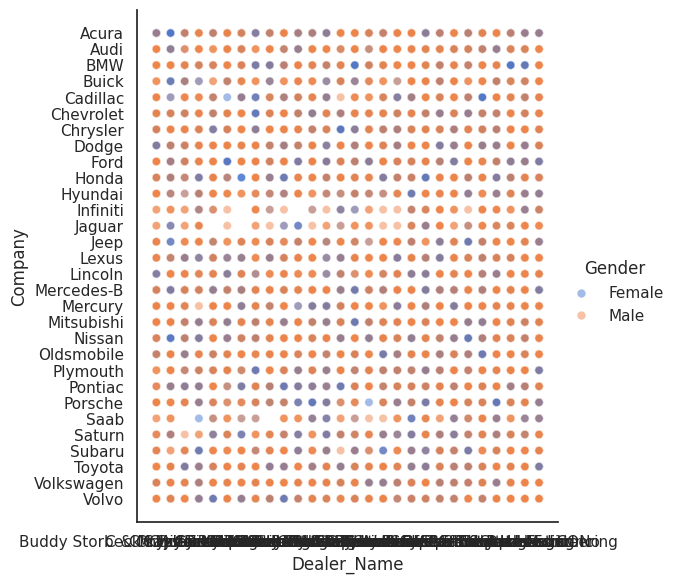

In [125]:

sns.set_theme(style="dark")
flights = sns.load_dataset("flights")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=flights,
    x="month", y="passengers", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=flights, x="month", y="passengers", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()